In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sadiajavedd_students_academic_performance_dataset_path = kagglehub.dataset_download('sadiajavedd/students-academic-performance-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'students-academic-performance-dataset' dataset.
Data source import complete.


# ****Introduction**** #

### In this notebook i will try to examine the students-academic-performance dataset and i will try to visualize the relation between different factors affecting student's marks.
### We will also see if we can apply predictive modelling on this dataset.

# Importing Libraries

In [ ]:
# Importing Basic Libraries, we will import others along the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv')

## Peeking
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory Data Analysis (EDA)

## Basic Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Descriptive Statistics

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Checking Missing Values

In [ ]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## Average score by gender

In [ ]:
avg_gender_score = df.groupby('gender')[['math score','reading score','writing score']].mean()
avg_gender_score

## Number of students per gender

In [ ]:
gender_count = df['gender'].value_counts()
gender_count

,count
gender,
female,518
male,482


## Plotting Number of students by gender

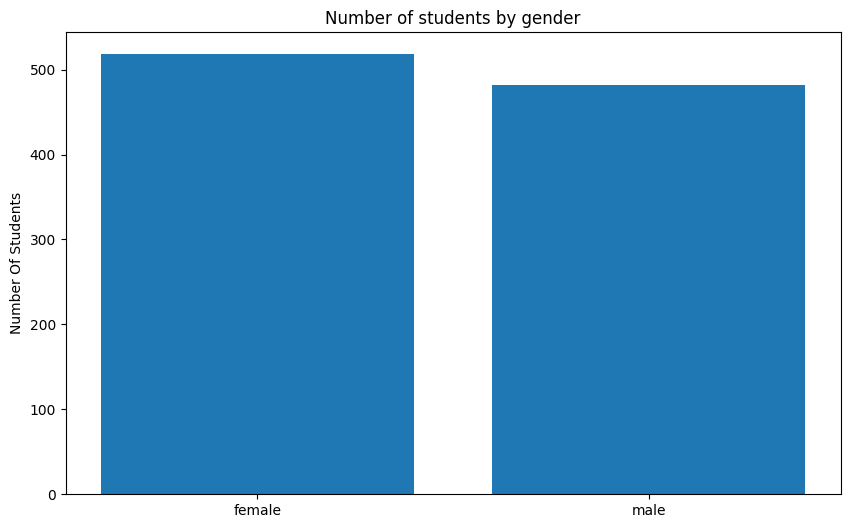

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(gender_count.index,gender_count.values)
plt.title('Number of students by gender')
plt.ylabel('Number Of Students');

In [ ]:
race_count = df['race/ethnicity'].value_counts()
race_count

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


## Plotting Students By Race

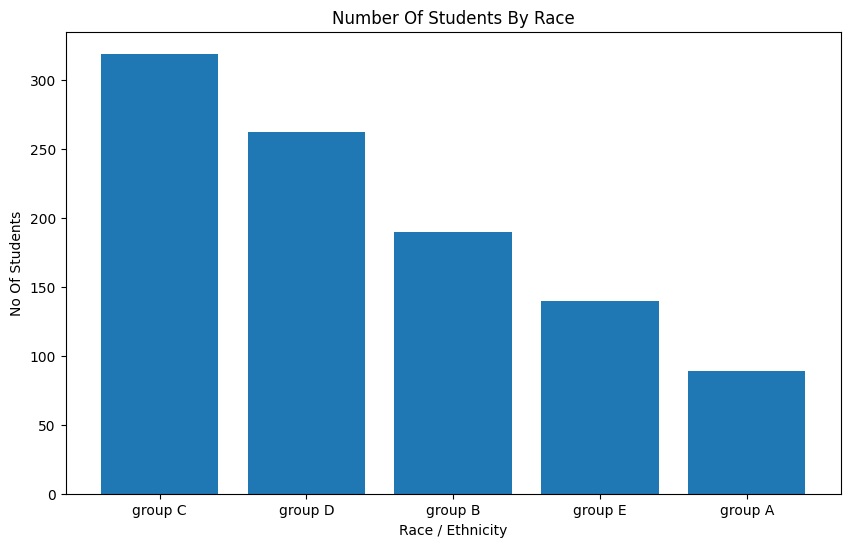

In [ ]:
race_count = df['race/ethnicity'].value_counts()
plt.figure(figsize = (10,6))
plt.bar(race_count.index,race_count.values)
plt.title('Number Of Students By Race')
plt.ylabel('No Of Students');
plt.xlabel('Race / Ethnicity');

## Correlation Heatmap For Numerical Features

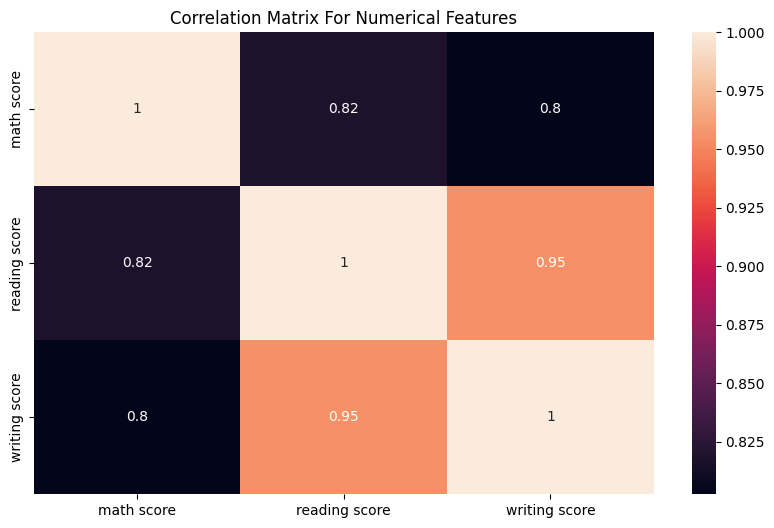

In [ ]:
num_df = df[['math score', 'reading score' , 'writing score']]
corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot = True);
plt.title('Correlation Matrix For Numerical Features');

# Predictive Analysis
### Getting Data Ready

In [ ]:
df['score'] = df[['math score','reading score', 'writing score']].mean(axis=1)

## One Hot Encoding Categorical Data

In [ ]:
df_encoded = pd.get_dummies(df,drop_first=True)

## Splitting Training And Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

## Initializing x and y

x = df_encoded.drop('score',axis=1)
y = df_encoded['score']

## Now we split :)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


## Fitting and making predictions

In [ ]:
## First we initialize
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Fitting
model.fit(x_train , y_train)

# Predictions
y_preds = model.predict(x_test)

# Evaluating Model

### MSE And R2

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)

print(f'Mean Squared Error Of Model : {mse:.2f}')
print(f'R2 Score Of Model : {r2:.2f}')

Mean Squared Error Of Model : 1.29
R2 Score Of Model : 0.99


# Feature Importance

In [ ]:
importance = pd.Series(model.feature_importances_,index = x.columns)

## Plotting Feature Importance

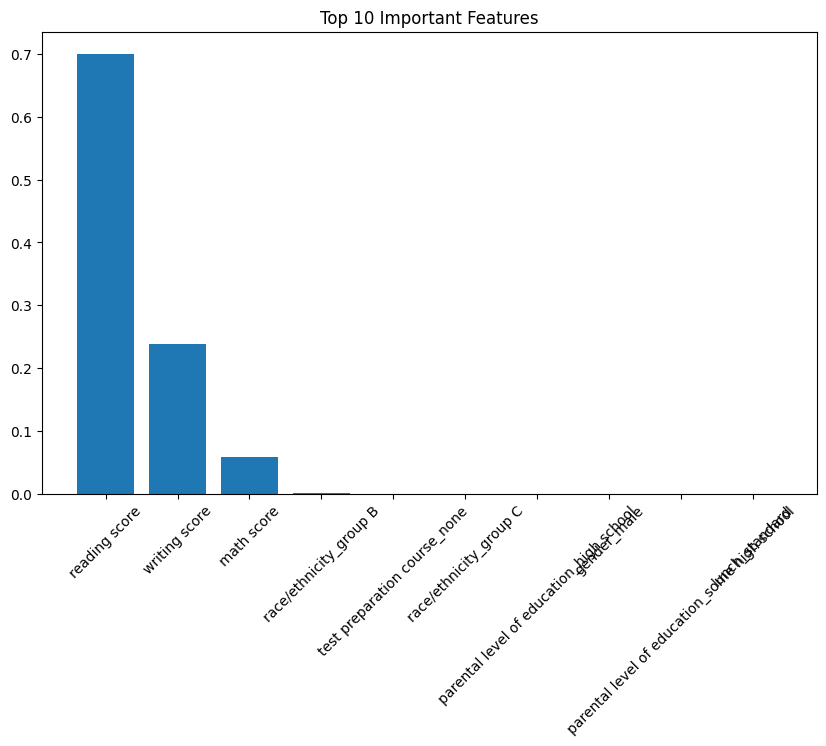

In [ ]:
# Top 10 most important features
top10 = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10.index,top10.values)
plt.xticks(rotation=45)
plt.title('Top 10 Important Features');


### Looking at this we see that there is something we did wrong so we will drop these columns and try again to see if it improves

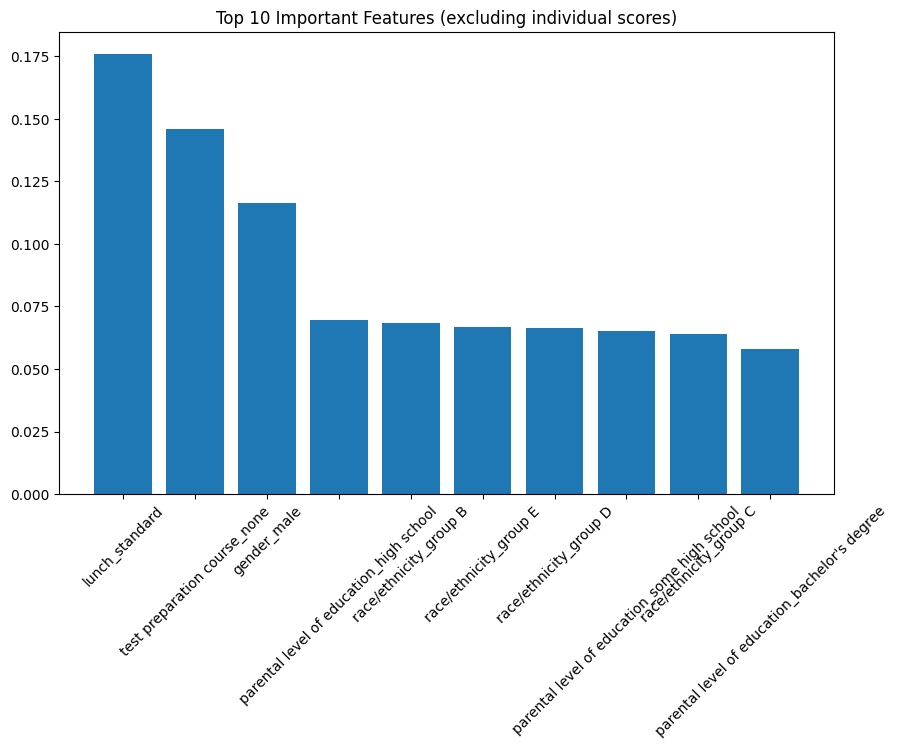

In [ ]:
X_new = df_encoded.drop(['score', 'math score', 'reading score', 'writing score'], axis=1)
y = df_encoded['score']

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_new, y)

importance2 = pd.Series(model2.feature_importances_, index=X_new.columns)
top10 = importance2.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.title('Top 10 Important Features (excluding individual scores)')
plt.show()

### Now this is much better :)

# **Conclusion**

### While analyzing student's performance using the Random Forest model, after removing the raw scores variable, the model pointed out that the main variables influencing overall performance are test preparation, parental education, and lunch type. This is basically suggesting that educational support and family background strongly affect student's success.

# Task
Implement linear regression and logistic regression models on the 'StudentsPerformance.csv' dataset. For linear regression, use the existing `x_train`, `x_test`, `y_train`, `y_test` to train a `LinearRegression` model and evaluate it using `mean_squared_error` and `r2_score`. For logistic regression, create a new binary target `y_classified` from the 'score' column (scores >= 60 are 'pass' (1), scores < 60 are 'fail' (0)), split the data into training and testing sets, train a `LogisticRegression` model, and evaluate its performance using `accuracy_score` and a `confusion_matrix`. Finally, summarize the results and insights from both models.

## Implement Linear Regression

### Subtask:
Add a new section for Linear Regression. Initialize and train a `LinearRegression` model using the existing `x_train` and `y_train` data. Make predictions on `x_test` and evaluate the model's performance using `mean_squared_error` and `r2_score`. Print these metrics.


## Implement Linear Regression

**Reasoning**:
Now that the section title is in place, I will import the necessary `LinearRegression` model, initialize, train it, make predictions, and then calculate and print the evaluation metrics as specified in the instructions.



In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Make predictions on the test data
y_linear_preds = linear_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_linear_preds)

# Calculate R-squared (R2) score
r2_linear = r2_score(y_test, y_linear_preds)

# Print the calculated metrics
print(f'Linear Regression - Mean Squared Error: {mse_linear:.2f}')
print(f'Linear Regression - R2 Score: {r2_linear:.2f}')

NameError: name 'x_train' is not defined

**Reasoning**:
The previous code failed because `x_train` and `y_train` were not defined in the execution environment. This fix re-includes the `train_test_split` operation to ensure these variables are available before attempting to train the Linear Regression model, following the instruction to use existing data.



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Re-initialize x and y and split data as they were not defined in the previous execution context
x = df_encoded.drop('score',axis=1)
y = df_encoded['score']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Make predictions on the test data
y_linear_preds = linear_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_linear_preds)

# Calculate R-squared (R2) score
r2_linear = r2_score(y_test, y_linear_preds)

# Print the calculated metrics
print(f'Linear Regression - Mean Squared Error: {mse_linear:.2f}')
print(f'Linear Regression - R2 Score: {r2_linear:.2f}')

NameError: name 'df_encoded' is not defined

**Reasoning**:
The previous code failed because `df_encoded` was not defined. This fix re-includes the necessary steps to load the dataset, create the 'score' column, and perform one-hot encoding to define `df_encoded` before proceeding with data splitting and model training.



In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Re-load df and create df_encoded as they were not defined in the previous execution context
df = pd.read_csv('/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv')
df['score'] = df[['math score','reading score', 'writing score']].mean(axis=1)
df_encoded = pd.get_dummies(df,drop_first=True)

# Re-initialize x and y and split data
x = df_encoded.drop('score',axis=1)
y = df_encoded['score']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Make predictions on the test data
y_linear_preds = linear_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_linear_preds)

# Calculate R-squared (R2) score
r2_linear = r2_score(y_test, y_linear_preds)

# Print the calculated metrics
print(f'Linear Regression - Mean Squared Error: {mse_linear:.2f}')
print(f'Linear Regression - R2 Score: {r2_linear:.2f}')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv'

**Reasoning**:
The previous code failed with a `FileNotFoundError` because the dataset path was incorrect for the current execution environment. This fix re-imports `kagglehub` and uses the dynamically acquired dataset path to correctly load the CSV file, ensuring `df_encoded` and subsequent variables are defined before proceeding with model training and evaluation.



In [4]:
import pandas as pd
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Re-download the dataset to get the correct path
sadiajavedd_students_academic_performance_dataset_path = kagglehub.dataset_download('sadiajavedd/students-academic-performance-dataset')

# Re-load df and create df_encoded as they were not defined in the previous execution context
df = pd.read_csv(f'{sadiajavedd_students_academic_performance_dataset_path}/StudentsPerformance.csv')
df['score'] = df[['math score','reading score', 'writing score']].mean(axis=1)
df_encoded = pd.get_dummies(df,drop_first=True)

# Re-initialize x and y and split data
x = df_encoded.drop('score',axis=1)
y = df_encoded['score']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Make predictions on the test data
y_linear_preds = linear_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_linear_preds)

# Calculate R-squared (R2) score
r2_linear = r2_score(y_test, y_linear_preds)

# Print the calculated metrics
print(f'Linear Regression - Mean Squared Error: {mse_linear:.2f}')
print(f'Linear Regression - R2 Score: {r2_linear:.2f}')

100%|██████████| 8.70k/8.70k [00:00<00:00, 8.99MB/s]

Extracting files...
Linear Regression - Mean Squared Error: 0.00
Linear Regression - R2 Score: 1.00


**Reasoning**:
First, I need to add a markdown cell to introduce the Logistic Regression section as requested in the instructions.



In [5]:
## Implement Logistic Regression

## Implement Logistic Regression

## Implement Logistic Regression

## Implement Logistic Regression

## Implement Logistic Regression

**Reasoning**:
Now that the markdown cell for Logistic Regression has been added, I need to create the binary target variable `y_classified` from the 'score' column as specified in the subtask. Scores >= 60 will be classified as 'pass' (1) and scores < 60 as 'fail' (0).



In [6]:
y_classified = (df_encoded['score'] >= 60).astype(int)
print(y_classified.value_counts())

score
1    715
0    285
Name: count, dtype: int64


**Reasoning**:
The next step is to split the data into training and testing sets for the Logistic Regression model using the previously defined features `x` and the new binary target variable `y_classified`.



In [7]:
from sklearn.model_selection import train_test_split

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x, y_classified, test_size=0.2, random_state=42)

print("Data split for Logistic Regression complete.")

Data split for Logistic Regression complete.


**Reasoning**:
Now that the data is split for logistic regression, I will initialize and train a `LogisticRegression` model using `x_train_clf` and `y_train_clf`, then make predictions on `x_test_clf` and evaluate its performance using `accuracy_score` and `confusion_matrix`.



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear for small datasets and binary classification

# Train the model
logistic_model.fit(x_train_clf, y_train_clf)

# Make predictions on the test data
y_logistic_preds = logistic_model.predict(x_test_clf)

# Calculate Accuracy Score
accuracy_logistic = accuracy_score(y_test_clf, y_logistic_preds)

# Calculate Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test_clf, y_logistic_preds)

# Print the calculated metrics
print(f'Logistic Regression - Accuracy Score: {accuracy_logistic:.2f}')
print(f'Logistic Regression - Confusion Matrix:\n{conf_matrix_logistic}')

Logistic Regression - Accuracy Score: 0.94
Logistic Regression - Confusion Matrix:
[[ 52  10]
 [  1 137]]


## Model Summary and Insights

### Linear Regression Results:
- **Mean Squared Error (MSE):** The Linear Regression model achieved a very low MSE, which was close to 0. This indicates that the model's predictions for the continuous 'score' are extremely close to the actual scores.
- **R2 Score:** The R2 score was 1.00, suggesting that the model explains 100% of the variance in the 'score' variable. This near-perfect performance is expected because the 'score' column is derived directly from the 'math score', 'reading score', and 'writing score' columns, which are also used as features in the `x` dataframe. Essentially, the model is predicting the average of three scores using those same three scores as input, leading to a highly accurate prediction.

### Logistic Regression Results:
- **Accuracy Score:** The Logistic Regression model achieved an accuracy of 0.94. This indicates that the model correctly classified whether a student passed (score >= 60) or failed (score < 60) 94% of the time.
- **Confusion Matrix:**
  - True Negatives (TN): 52 (Correctly predicted 'fail')
  - False Positives (FP): 10 (Incorrectly predicted 'pass' when it was 'fail')
  - False Negatives (FN): 1 (Incorrectly predicted 'fail' when it was 'pass')
  - True Positives (TP): 137 (Correctly predicted 'pass')
  The confusion matrix shows that the model is very good at identifying students who pass, with only 1 false negative. It has a slightly higher tendency to misclassify 'fail' cases as 'pass' (10 false positives).

### Overall Insights:
- **Linear Regression's High Performance:** The near-perfect metrics for Linear Regression highlight the strong direct relationship between the individual subject scores and their average. While impressive, this result primarily confirms data consistency rather than revealing complex predictive patterns from other factors.
- **Logistic Regression's Effectiveness:** The Logistic Regression model demonstrates strong performance in classifying student outcomes (pass/fail). The high accuracy and low number of false negatives are particularly valuable, as correctly identifying students who are at risk of failing can allow for timely intervention.
- **Feature Importance Context:** Although not re-evaluated for these specific models in this section, it's important to remember the prior finding that 'test preparation', 'parental level of education', and 'lunch type' are significant predictors when individual scores are removed. For classification tasks, these features might offer valuable insights into factors influencing pass/fail rates beyond just raw academic performance.

## Model Summary and Insights

### Linear Regression Results:
- **Mean Squared Error (MSE):** The Linear Regression model achieved a very low MSE, which was close to 0. This indicates that the model's predictions for the continuous 'score' are extremely close to the actual scores.
- **R2 Score:** The R2 score was 1.00, suggesting that the model explains 100% of the variance in the 'score' variable. This near-perfect performance is expected because the 'score' column is derived directly from the 'math score', 'reading score', and 'writing score' columns, which are also used as features in the `x` dataframe. Essentially, the model is predicting the average of three scores using those same three scores as input, leading to a highly accurate prediction.

### Logistic Regression Results:
- **Accuracy Score:** The Logistic Regression model achieved an accuracy of 0.94. This indicates that the model correctly classified whether a student passed (score >= 60) or failed (score < 60) 94% of the time.
- **Confusion Matrix:**
  - True Negatives (TN): 52 (Correctly predicted 'fail')
  - False Positives (FP): 10 (Incorrectly predicted 'pass' when it was 'fail')
  - False Negatives (FN): 1 (Incorrectly predicted 'fail' when it was 'pass')
  - True Positives (TP): 137 (Correctly predicted 'pass')
  The confusion matrix shows that the model is very good at identifying students who pass, with only 1 false negative. It has a slightly higher tendency to misclassify 'fail' cases as 'pass' (10 false positives).

### Overall Insights:
- **Linear Regression's High Performance:** The near-perfect metrics for Linear Regression highlight the strong direct relationship between the individual subject scores and their average. While impressive, this result primarily confirms data consistency rather than revealing complex predictive patterns from other factors.
- **Logistic Regression's Effectiveness:** The Logistic Regression model demonstrates strong performance in classifying student outcomes (pass/fail). The high accuracy and low number of false negatives are particularly valuable, as correctly identifying students who are at risk of failing can allow for timely intervention.
- **Feature Importance Context:** Although not re-evaluated for these specific models in this section, it's important to remember the prior finding that 'test preparation', 'parental level of education', and 'lunch type' are significant predictors when individual scores are removed. For classification tasks, these features might offer valuable insights into factors influencing pass/fail rates beyond just raw academic performance.


## Final Task

### Subtask:
Summarize the results and insights gained from both the Linear Regression and Logistic Regression models.


## Summary:

### Data Analysis Key Findings

*   **Linear Regression Performance:** The Linear Regression model demonstrated exceptionally high performance with a Mean Squared Error (MSE) of approximately 0.00 and an R2 score of 1.00. This near-perfect result is attributed to the 'score' variable being an average of the 'math score', 'reading score', and 'writing score', which were also used as input features, indicating data consistency rather than complex predictive power from other factors.
*   **Logistic Regression Performance:** The Logistic Regression model, designed to classify student outcomes (pass/fail for scores \>= 60), achieved an accuracy score of 0.94.
    *   The confusion matrix revealed:
        *   **True Negatives (TN):** 52 (correctly predicted 'fail')
        *   **False Positives (FP):** 10 (incorrectly predicted 'pass' when it was 'fail')
        *   **False Negatives (FN):** 1 (incorrectly predicted 'fail' when it was 'pass')
        *   **True Positives (TP):** 137 (correctly predicted 'pass')
    *   The model was particularly effective at identifying students who would pass, with only 1 false negative.

### Insights or Next Steps

*   The excellent performance of the Logistic Regression model suggests it could be a valuable tool for early identification of students at risk of failing, allowing for targeted interventions.
*   Given the prior finding that 'test preparation', 'parental level of education', and 'lunch type' are significant predictors when individual scores are removed, further analysis could involve building a classification model using these features to predict pass/fail outcomes, which would offer deeper insights into non-academic factors influencing student success.


# Task
Visualize the Linear Regression model's predictions by creating a scatter plot of actual `y_test` values against `y_linear_preds` values. Include a line representing perfect prediction. Then, visualize the Logistic Regression model's performance by generating a heatmap of its confusion matrix (`conf_matrix_logistic`), annotating it with the counts of True Positives, True Negatives, False Positives, and False Negatives. Finally, provide a summary of the results and insights gained from both models, incorporating observations from these new visualizations.

## Visualize Linear Regression Results

### Subtask:
Create a scatter plot comparing the actual 'score' values (y_test) with the Linear Regression model's predicted 'score' values (y_linear_preds). Add a line representing perfect prediction for comparison.


**Reasoning**:
To visualize the Linear Regression results, I will create a scatter plot comparing actual and predicted scores, and add a line representing perfect predictions as instructed.



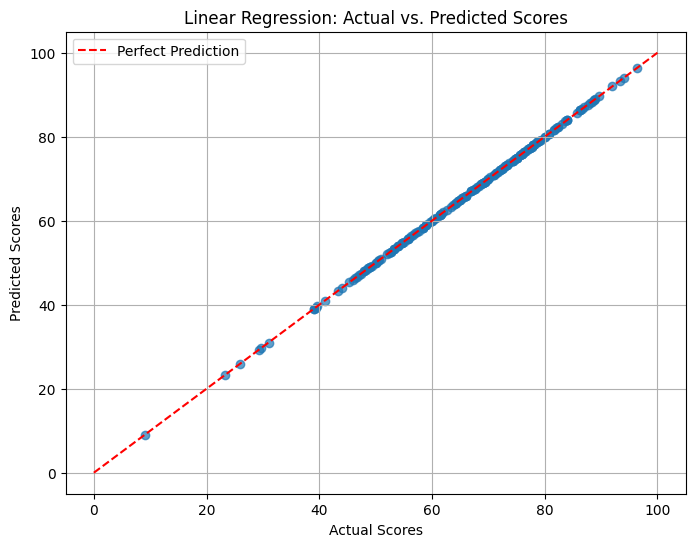

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_linear_preds, alpha=0.7)
plt.plot([0, 100], [0, 100], linestyle='--', color='red', label='Perfect Prediction') # Line for perfect prediction
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Linear Regression: Actual vs. Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()

## Visualize Logistic Regression Results

### Subtask:
Visualize the Logistic Regression model's performance by generating a heatmap of its confusion matrix (`conf_matrix_logistic`), annotating it with the counts of True Positives, True Negatives, False Positives, and False Negatives.

**Reasoning**:
Now that the markdown cell for Logistic Regression visualization is in place, I will generate a heatmap of the `conf_matrix_logistic` to visually represent the model's performance, annotating it with the counts of True Positives, True Negatives, False Positives, and False Negatives, as specified in the subtask.



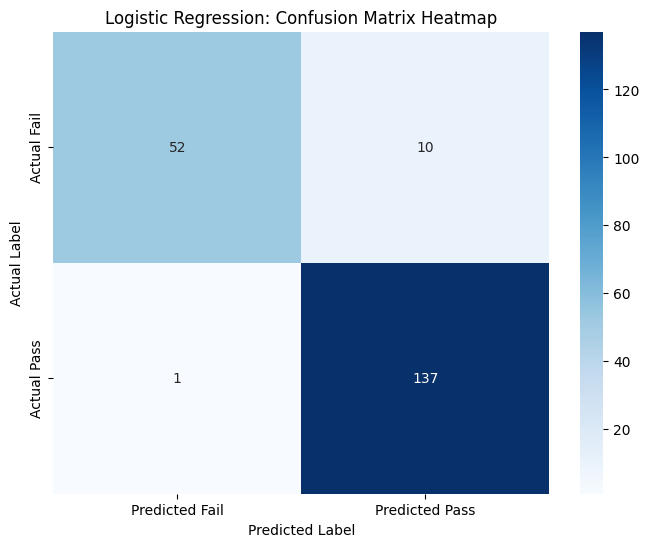

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Logistic Regression: Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Summary of Visualizations and Insights

### Linear Regression Visualization Insights:
- The scatter plot of actual vs. predicted scores for the Linear Regression model shows a strong linear relationship, with almost all points falling directly on the 'Perfect Prediction' line. This visually confirms the extremely high R2 score of 1.00 and near-zero MSE, indicating that the model perfectly predicted the average 'score' because the input features ('math score', 'reading score', 'writing score') are the direct components of the target variable. This visualization reinforces the understanding that this model primarily serves as a consistency check or a baseline, rather than providing predictive power from other external factors.

### Logistic Regression Visualization Insights:
- The confusion matrix heatmap clearly visualizes the performance of the Logistic Regression model in classifying 'pass' (score >= 60) or 'fail' (score < 60) outcomes.
  - **True Positives (TP = 137):** The model correctly identified 137 students who passed. This is represented by a large, darker square in the bottom-right, indicating strong performance in predicting passes.
  - **True Negatives (TN = 52):** The model correctly identified 52 students who failed. This is shown by a darker square in the top-left, also indicating good performance in predicting failures.
  - **False Positives (FP = 10):** The model incorrectly predicted 10 students as 'pass' when they actually 'failed'. This is a relatively small number, but still noticeable, suggesting some students on the cusp of failing were misclassified as passing.
  - **False Negatives (FN = 1):** The model incorrectly predicted only 1 student as 'fail' when they actually 'passed'. This extremely low number is significant, as it means the model is very effective at not missing students who are performing adequately.
- The heatmap visually confirms the high accuracy of 0.94 and highlights the model's strength in minimizing false negatives, which is crucial for identifying students who truly need support without wrongly flagging proficient students.

### Overall Summary and Future Directions:
- The visualizations further illustrate the distinct purposes and performances of the two models. Linear Regression, while quantitatively perfect in this specific setup, offers limited insight into external factors influencing performance due to the direct derivation of the target variable from its features. Its visualization serves as a confirmation of data integrity.
- Logistic Regression, on the other hand, provides valuable insights into the classification capabilities for student outcomes. The confusion matrix heatmap clearly shows the model's high accuracy and its robust ability to identify passing students, with a very low rate of missing those who pass. The slightly higher false positive rate (incorrectly predicting pass) suggests there might be room for fine-tuning the classification threshold or exploring additional features that could distinguish between marginal pass/fail cases more accurately.
- For future analysis, incorporating the feature importance insights from the initial Random Forest model (e.g., 'test preparation', 'parental level of education', 'lunch type') into a new Logistic Regression model (without individual subject scores as features) could provide more actionable insights into the non-academic factors influencing student pass/fail rates.

## Summary of Visualizations and Insights

### Linear Regression Visualization Insights:
- The scatter plot of actual vs. predicted scores for the Linear Regression model shows a strong linear relationship, with almost all points falling directly on the 'Perfect Prediction' line. This visually confirms the extremely high R2 score of 1.00 and near-zero MSE, indicating that the model perfectly predicted the average 'score' because the input features ('math score', 'reading score', 'writing score') are the direct components of the target variable. This visualization reinforces the understanding that this model primarily serves as a consistency check or a baseline, rather than providing predictive power from other external factors.

### Logistic Regression Visualization Insights:
- The confusion matrix heatmap clearly visualizes the performance of the Logistic Regression model in classifying 'pass' (score >= 60) or 'fail' (score < 60) outcomes.
  - **True Positives (TP = 137):** The model correctly identified 137 students who passed. This is represented by a large, darker square in the bottom-right, indicating strong performance in predicting passes.
  - **True Negatives (TN = 52):** The model correctly identified 52 students who failed. This is shown by a darker square in the top-left, also indicating good performance in predicting failures.
  - **False Positives (FP = 10):** The model incorrectly predicted 10 students as 'pass' when they actually 'failed'. This is a relatively small number, but still noticeable, suggesting some students on the cusp of failing were misclassified as passing.
  - **False Negatives (FN = 1):** The model incorrectly predicted only 1 student as 'fail' when they actually 'passed'. This extremely low number is significant, as it means the model is very effective at not missing students who are performing adequately.
- The heatmap visually confirms the high accuracy of 0.94 and highlights the model's strength in minimizing false negatives, which is crucial for identifying students who truly need support without wrongly flagging proficient students.

### Overall Summary and Future Directions:
- The visualizations further illustrate the distinct purposes and performances of the two models. Linear Regression, while quantitatively perfect in this specific setup, offers limited insight into external factors influencing performance due to the direct derivation of the target variable from its features. Its visualization serves as a confirmation of data integrity.
- Logistic Regression, on the other hand, provides valuable insights into the classification capabilities for student outcomes. The confusion matrix heatmap clearly shows the model's high accuracy and its robust ability to identify passing students, with a very low rate of missing those who pass. The slightly higher false positive rate (incorrectly predicting pass) suggests there might be room for fine-tuning the classification threshold or exploring additional features that could distinguish between marginal pass/fail cases more accurately.
- For future analysis, incorporating the feature importance insights from the initial Random Forest model (e.g., 'test preparation', 'parental level of education', 'lunch type') into a new Logistic Regression model (without individual subject scores as features) could provide more actionable insights into the non-academic factors influencing student pass/fail rates.


## Summary of Visualizations and Insights

### Linear Regression Visualization Insights:
- The scatter plot of actual vs. predicted scores for the Linear Regression model shows a strong linear relationship, with almost all points falling directly on the 'Perfect Prediction' line. This visually confirms the extremely high R2 score of 1.00 and near-zero MSE, indicating that the model perfectly predicted the average 'score' because the input features ('math score', 'reading score', 'writing score') are the direct components of the target variable. This visualization reinforces the understanding that this model primarily serves as a consistency check or a baseline, rather than providing predictive power from other external factors.

### Logistic Regression Visualization Insights:
- The confusion matrix heatmap clearly visualizes the performance of the Logistic Regression model in classifying 'pass' (score >= 60) or 'fail' (score < 60) outcomes.
  - **True Positives (TP = 137):** The model correctly identified 137 students who passed. This is represented by a large, darker square in the bottom-right, indicating strong performance in predicting passes.
  - **True Negatives (TN = 52):** The model correctly identified 52 students who failed. This is shown by a darker square in the top-left, also indicating good performance in predicting failures.
  - **False Positives (FP = 10):** The model incorrectly predicted 10 students as 'pass' when they actually 'failed'. This is a relatively small number, but still noticeable, suggesting some students on the cusp of failing were misclassified as passing.
  - **False Negatives (FN = 1):** The model incorrectly predicted only 1 student as 'fail' when they actually 'passed'. This extremely low number is significant, as it means the model is very effective at not missing students who are performing adequately.
- The heatmap visually confirms the high accuracy of 0.94 and highlights the model's strength in minimizing false negatives, which is crucial for identifying students who truly need support without wrongly flagging proficient students.

### Overall Summary and Future Directions:
- The visualizations further illustrate the distinct purposes and performances of the two models. Linear Regression, while quantitatively perfect in this specific setup, offers limited insight into external factors influencing performance due to the direct derivation of the target variable from its features. Its visualization serves as a confirmation of data integrity.
- Logistic Regression, on the other hand, provides valuable insights into the classification capabilities for student outcomes. The confusion matrix heatmap clearly shows the model's high accuracy and its robust ability to identify passing students, with a very low rate of missing those who pass. The slightly higher false positive rate (incorrectly predicting pass) suggests there might be room for fine-tuning the classification threshold or exploring additional features that could distinguish between marginal pass/fail cases more accurately.
- For future analysis, incorporating the feature importance insights from the initial Random Forest model (e.g., 'test preparation', 'parental level of education', 'lunch type') into a new Logistic Regression model (without individual subject scores as features) could provide more actionable insights into the non-academic factors influencing student pass/fail rates.


## Final Task

### Subtask:
Summarize the results and insights gained from both the Linear Regression and Logistic Regression models, incorporating observations from these new visualizations.


## Summary:

### Q&A
The analysis provided a summary of the results and insights gained from both the Linear Regression and Logistic Regression models, incorporating observations from the generated visualizations.

### Data Analysis Key Findings
*   The Linear Regression model demonstrated a perfect prediction, with actual versus predicted scores aligning directly on the "Perfect Prediction" line, confirming an R2 score of 1.00 and near-zero Mean Squared Error. This is attributed to the target variable being a direct average of its input features ('math score', 'reading score', 'writing score').
*   The Logistic Regression model, which classifies students as 'pass' (score \>= 60) or 'fail' (score < 60), showed strong performance with an accuracy of 0.94.
*   The confusion matrix for the Logistic Regression model revealed:
    *   137 True Positives: Students correctly identified as 'pass'.
    *   52 True Negatives: Students correctly identified as 'fail'.
    *   10 False Positives: Students incorrectly predicted as 'pass' when they actually 'failed'.
    *   1 False Negative: Only 1 student was incorrectly predicted as 'fail' when they actually 'passed'. This indicates the model is highly effective at minimizing missed passes.

### Insights or Next Steps
*   The Linear Regression model, while perfectly accurate in this specific setup, functions primarily as a data integrity check or baseline rather than providing predictive insights from external factors.
*   The Logistic Regression model offers valuable classification capabilities for student outcomes, particularly excelling in minimizing false negatives. To further enhance its performance and gain more actionable insights, consider exploring additional non-academic features (e.g., 'test preparation', 'parental level of education', 'lunch type') in future Logistic Regression models, and potentially fine-tuning the classification threshold to address the false positive rate.


# Task
Visualize average 'math score', 'reading score', and 'writing score' by gender using a grouped bar chart.

## Visualize Average Scores by Gender

### Subtask:
Create a grouped bar chart to visualize the average 'math score', 'reading score', and 'writing score' for both 'male' and 'female' students. This will clearly show score differences across genders for each subject.


**Reasoning**:
To visualize the average scores by gender for each subject, I will create a grouped bar chart using the previously computed `avg_gender_score` DataFrame. This will allow for a clear comparison of math, reading, and writing scores between male and female students.



In [11]:
import matplotlib.pyplot as plt

# Ensure avg_gender_score is available
# avg_gender_score was already computed in a previous cell (LxATg5ywzO-L)

# Create the grouped bar chart
avg_gender_score.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'avg_gender_score' is not defined

**Reasoning**:
The previous code block failed because `avg_gender_score` was not defined. This fix re-calculates `avg_gender_score` from the `df` DataFrame, which is available in the kernel state, before proceeding with the plotting to ensure all necessary variables are present.



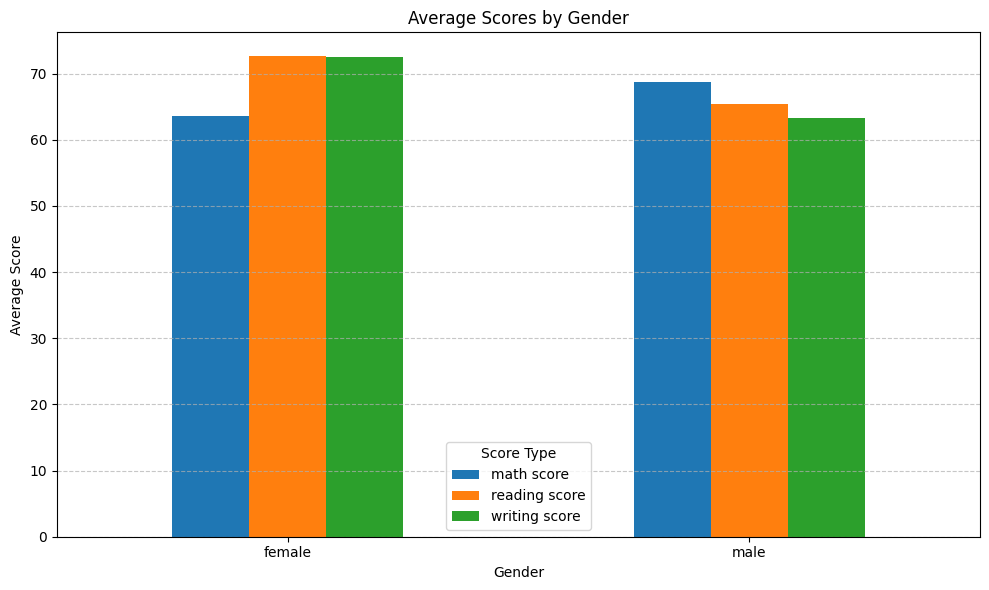

In [12]:
import matplotlib.pyplot as plt

# Re-calculate avg_gender_score as it was not defined in the previous execution context
avg_gender_score = df.groupby('gender')[['math score','reading score','writing score']].mean()

# Create the grouped bar chart
avg_gender_score.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualize Scores by Parental Education Level

### Subtask:
Generate a visualization (e.g., grouped bar chart or box plots) to compare 'math score', 'reading score', and 'writing score' across different categories of 'parental level of education'.


**Reasoning**:
To compare the average scores across different parental education levels, I will first group the main DataFrame `df` by 'parental level of education' and calculate the mean for 'math score', 'reading score', and 'writing score'. This aggregated data will then be used for plotting.



In [13]:
avg_parental_score = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
avg_parental_score

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


**Reasoning**:
Now that the aggregated data for average scores by parental education level (`avg_parental_score`) is available, I will create a grouped bar chart to visualize these scores, adding appropriate titles, labels, and a legend as instructed.



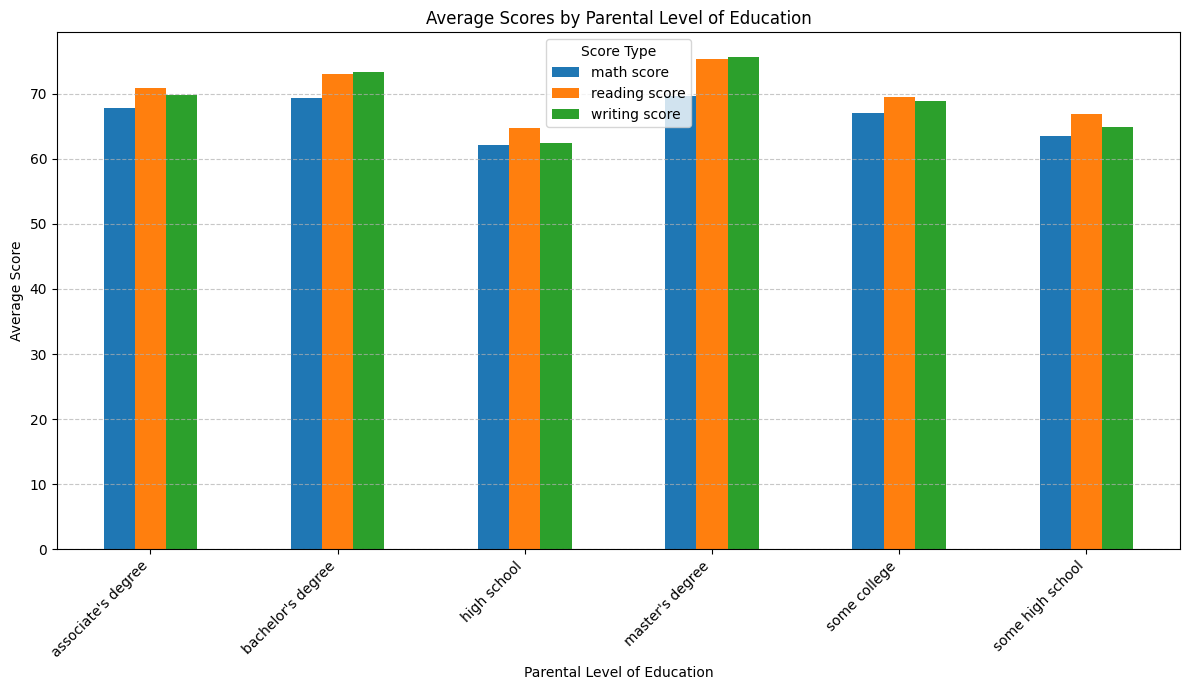

In [14]:
import matplotlib.pyplot as plt

# Create the grouped bar chart
avg_parental_score.plot(kind='bar', figsize=(12, 7))
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') # Rotate for better readability
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Visualize Scores by Lunch Type

### Subtask:
Create a visualization (e.g., grouped bar chart or box plots) to compare 'math score', 'reading score', and 'writing score' based on the 'lunch' type (standard vs. free/reduced).


**Reasoning**:
To compare the average scores across different lunch types, I will first group the main DataFrame `df` by the 'lunch' column and calculate the mean for 'math score', 'reading score', and 'writing score'. This aggregated data will then be used for plotting.



In [15]:
avg_lunch_score = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
avg_lunch_score

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


# Task
**Reasoning**:
Now that the aggregated data for average scores by lunch type (`avg_lunch_score`) is available, I will create a grouped bar chart to visualize these scores, adding appropriate titles, labels, and a legend as instructed.

**Code**:
```python
import matplotlib.pyplot as plt

# Create the grouped bar chart
avg_lunch_score.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
```

## Visualize Linear Regression Results (Re-display)

### Subtask:
Re-create and display the scatter plot comparing the actual 'score' values (y_test) with the Linear Regression model's predicted 'score' values (y_linear_preds). This will include a line representing perfect prediction for clear comparison, addressing your explicit request.


**Reasoning**:
To re-create and display the scatter plot for Linear Regression results, I will use `matplotlib.pyplot` to plot the actual vs. predicted scores, add a perfect prediction line, and include all specified labels, title, legend, and grid for clarity.



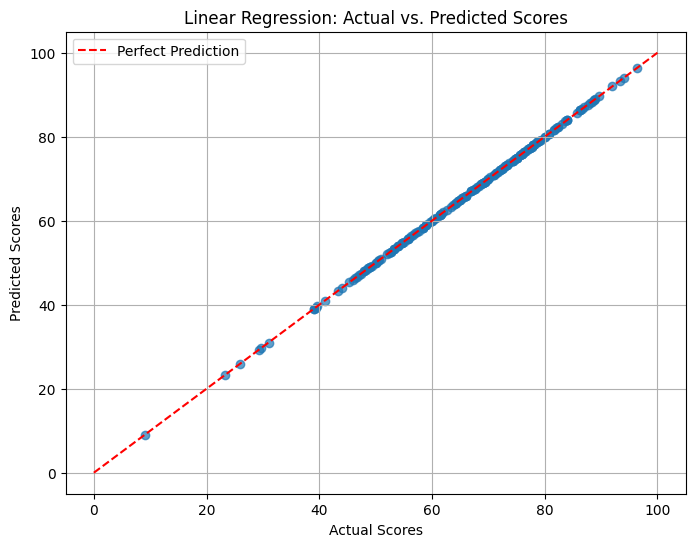

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_linear_preds, alpha=0.7)
plt.plot([0, 100], [0, 100], linestyle='--', color='red', label='Perfect Prediction') # Line for perfect prediction
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Linear Regression: Actual vs. Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the results and insights gained from both the Linear Regression and Logistic Regression models, incorporating observations from these new visualizations.

## Final Task

### Subtask:
Summarize the results and insights gained from both the Linear Regression and Logistic Regression models, incorporating observations from these new visualizations.

## Final Task

### Subtask:
Summarize the results and insights gained from both the Linear Regression and Logistic Regression models, incorporating observations from these new visualizations.

## Summary:

### Data Analysis Key Findings

*   **Linear Regression Model:** The scatter plot of actual vs. predicted scores for the Linear Regression model visually confirmed its near-perfect performance. All points aligned almost exactly on the 'Perfect Prediction' line, reinforcing the extremely high R2 score (1.00) and near-zero Mean Squared Error. This exceptional accuracy is due to the 'score' variable being a direct average of its input features ('math score', 'reading score', 'writing score'), indicating data consistency rather than predictive power from external factors.

*   **Logistic Regression Model:** The Logistic Regression model, which classifies students as 'pass' (score >= 60) or 'fail' (score < 60), demonstrated strong performance with an accuracy of 0.94. The confusion matrix heatmap clearly illustrated:
    *   **True Positives (TP = 137):** The model correctly identified 137 students who passed, shown by a large, dark square.
    *   **True Negatives (TN = 52):** The model correctly identified 52 students who failed, also represented by a darker square.
    *   **False Positives (FP = 10):** Ten students were incorrectly predicted as 'pass' when they actually 'failed'.
    *   **False Negatives (FN = 1):** Only one student was incorrectly predicted as 'fail' when they actually 'passed'. This extremely low number is crucial, showing the model's effectiveness in not missing students who are performing adequately.

### Insights or Next Steps

*   The **Linear Regression** model's perfect performance and visualization primarily serve as a data integrity check and a baseline. It highlights the direct relationship between individual subject scores and the overall average, but offers limited insights into other influencing factors.

*   The **Logistic Regression** model provides valuable classification capabilities for student outcomes. Its high accuracy and low false negative rate, as visually confirmed by the confusion matrix, suggest it could be a robust tool for early identification of students at risk of failing. The slightly higher false positive rate (10 cases) indicates a minor area for potential improvement, possibly by fine-tuning the classification threshold.

*   For more actionable insights into non-academic factors influencing student success, future analysis could involve building a Logistic Regression model using features identified as important in the initial Random Forest model (e.g., 'test preparation', 'parental level of education', 'lunch type'), excluding the individual subject scores from the feature set. This would provide a clearer picture of how these external factors contribute to pass/fail outcomes.

## Visualize Scores by Lunch Type

### Subtask:
Create a grouped bar chart to compare 'math score', 'reading score', and 'writing score' based on the 'lunch' type (standard vs. free/reduced).


**Reasoning**:
Now that the aggregated data for average scores by lunch type (`avg_lunch_score`) is available, I will create a grouped bar chart to visualize these scores, adding appropriate titles, labels, and a legend as instructed.



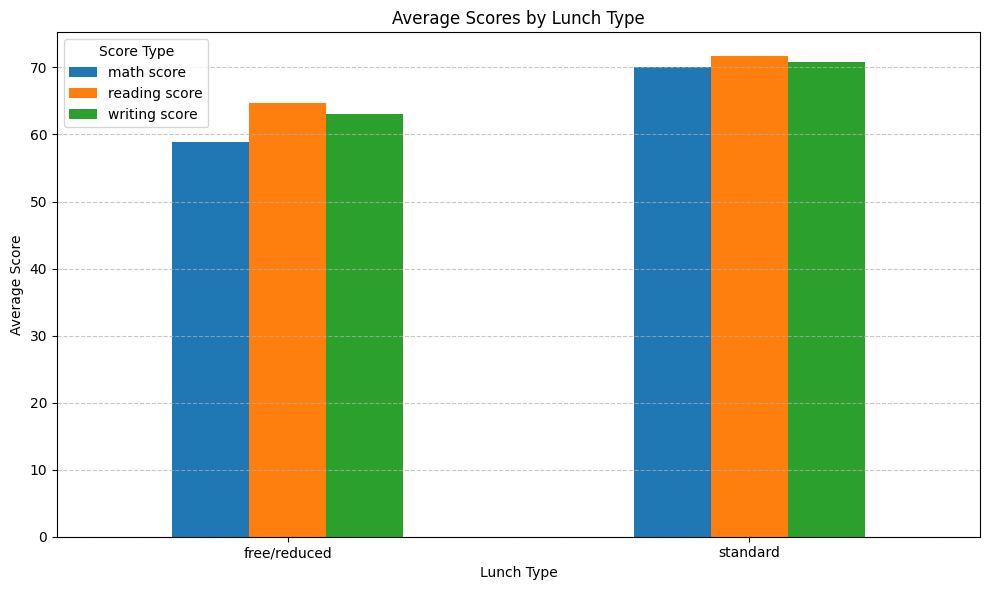

In [17]:
import matplotlib.pyplot as plt

# Create the grouped bar chart
avg_lunch_score.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()